# Recuperando dados do OpenStreetMap

![](images/OSM_logo.png)

## O que é o OpenStreetMap?

O OpenStreetMap (OSM) é um projeto colaborativo global (crowdsourced) e conjunto de dados que visa criar um mapa editável gratuito do mundo, contendo muitas informações sobre o nosso ambiente.
Ele contém dados, por exemplo, sobre ruas, edifícios, serviços diferentes.

O OSM tem uma grande base de usuários com mais de 4 milhões e mais de um milhão de contribuintes que atualizam ativamente o banco de dados do OSM com 3 milhões de mudanças por dia. No total, o OSM contém mais de 4 bilhões de nós que formam a base do mundo mapeado digitalmente, e que o OSM oferece (estatísticas de novembro de 2017)(http://wiki.openstreetmap.org/wiki/Stats)).

O OpenStreetMap é não é usado apenas para integrar os **mapas do OSM** como mapas em segundo plano para visualizações ou mapas on-line, mas também para muitas outras finalidades, como **roteamento**, **geocodificação **, **educação** e **pesquisa**. O OSM é também é amplamente utilizado para resposta humanitária, por exemplo, em áreas de crise (após desastres naturais) e para fomentar o desenvolvimento econômico (veja mais no site [Humanitarian OpenStreetMap Team (HOTOSM)](https://www.hotosm.org)).


## OSMnx

Um outro módulo bastante útil em Python  para GIS  é o [OSMnx] (https://github.com/gboeing/osmnx)
que pode ser usado para recuperar, construir, analisar e visualizar redes de ruas do OpenStreetMap, e também recuperar dados sobre pontos de interesse, como restaurantes, escolas e muitos tipos diferentes de serviços. Também é fácil conduzir o roteamento de rede com base em caminhada, ciclismo ou direção, combinando as funcionalidades do OSMnx com um pacote de grafos do python chamado [NetworkX](https://networkx.github.io/documentation/stable/).

## Fazer o download e visualizar os dados do OpenStreetMap com o OSMnx

Um dos recursos mais úteis que o OSMnx fornece é uma maneira fácil para recuperar dados do [OpenStreetMap](http://www.openstreetmap.org) (usando [API OverPass](http://wiki.openstreetmap.org/)).

Neste tutorial, aprenderemos a baixar e visualizar dados do OSM cobrindo uma área específica de interesse.

O OSMnx torna isso muito fácil, pois permite especificar um endereço para recuperar os dados do OpenStreetMap em torno dessa área. Na verdade, o OSMnx usa a mesma API de geocodificação da Nominatim para fazer isso, o que testamos durante o a aula de geocoding.

- Vamos recuperar os dados do OpenStreetMap (OSM) especificando "Brasil, Ceará, Fortaleza, Pici" como o endereço onde os dados devem ser baixados.

> Podemos baixar o pacote OSMnx no nosso ambiente com o seguitne comando: ***conda install -c conda-forge osmnx***

In [1]:
import osmnx as ox
import matplotlib.pyplot as plt
%matplotlib inline

# Specify the name that is used to seach for the data
place_name = "Brasil, Ceará, Fortaleza"

# Fetch OSM street network from the location
graph = ox.graph_from_place(place_name)
type(graph)

networkx.classes.multidigraph.MultiDiGraph

Como podemos ver os dados que recuperamos é um objeto de dados especial chamado `networkx.classes.multidigraph.MultiDiGraph`. 

Um DiGraph é um tipo de dados que armazena vértices e arestas com dados ou atributos opcionais. O que podemos ver aqui é que esse tipo de dado pertence a um módulo Python chamado [networkx](https://networkx.github.io/documentation/stable/) que pode ser usado para criar, manipular e estudar a estrutura, a dinâmica e possui funções especificas para análise em rede de grafo. O módulo Networkx contém algoritmos que podem ser usados para calcular [caminhos mais curtos](https://networkx.github.io/documentation/networkx-1.10/reference/algorithms.shortest_paths.html) ao longo das redes rodoviárias usando, por exemplo, o algoritmo de [Dijkstra](https://en.wikipedia.org/wiki/Dijkstra%27s_algorithm) ou [A\* algorithm](https://en.wikipedia.org/wiki/A*_search_algorithm).

- Vamos ver como é a nossa rede de ruas. É fácil visualizar o gráfico com osmnx com a função `plot_graph ()`. A função utiliza o Matplotlib para visualizar os dados, portanto, como resultado, ele retorna uma figura de matplotlib e objetos de eixo:

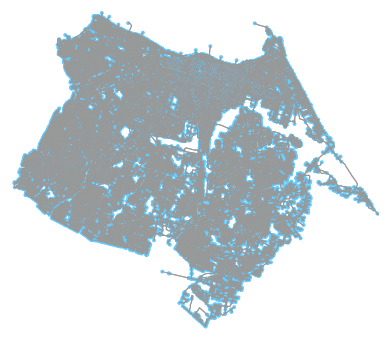

In [2]:
# Plot the streets
fig, ax = ox.plot_graph(graph)

Agora podemos ver que nosso gráfico contém os vértices ou nós (círculos azuis) e as arestas (linhas cinzas) que conectam esses nós entre si.

Também é possível recuperar outros tipos de recursos de dados do OSM com osmnx, como edifícios ou pontos de interesse (POIs).

# Análise de rede em Python

Encontrar um caminho mais curto usando uma rede de ruas específica, é um problema comum em GIS.

Isto ferramente de extrema importância no mundo moderno e está presente em diversas aplicações, por exemplo, os aplicativos de GPS, que são aplicações usadas diariamente para encontrar o **roteamento** usando algoritmos específicos para encontrar a rota ideal entre dois (ou múltiplos) pontos.

O módulo [Networkx](https://networkx.github.io/documentation/stable/) fornece muitas ferramentas que podem ser usadas para analisar redes de várias maneiras diferentes. Também contém algoritmos
como o algoritmo de[Dijkstra](https://networkx.github.io/documentation/networkx-1.10/reference/generated/networkx.algorithms.shortest_paths.weighted.single_source_dijkstra.html#networkx.algorithms.shortest_paths.weighted.single_source_dijkstra) ou
[A\*](https://networkx.github.io/documentation/networkx-1.10/reference/generated/networkx.algorithms.shortest_paths.astar.astar_path.html#networkx.algorithms.shortest_paths.astar.astar_path) que são comumente usados para encontrar caminhos mais curtos ao longo da rede de transporte.

Em seguida, testaremos as funcionalidades de roteamento do osmnx encontrando um caminho mais curto entre dois pontos baseados em estradas possuem acesso para carros.

- Vamos primeiro fazer o download dos dados do OSM do bairro Pici, mas desta vez incluir apenas os segmentos da rua que são tranquilos. No omsnx é possível recuperar apenas as ruas que são dirigíveis especificando ''drive'' no parâmetro `network_type` que pode ser usado para especificar que tipos de ruas são recuperadas do OpenStreetMap (outras possibilidades são `walk` e `bike`).

In [3]:
# Specify the name that is used to seach for the data
place_name = "Brasil, Ceará, Fortaleza"

# Fetch OSM street network from the location
graph_drive = ox.graph_from_place(place_name, network_type='drive')

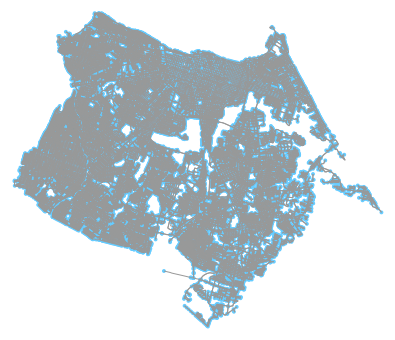

In [4]:
fig, ax = ox.plot_graph(graph_drive)

Agora que foi recuperado apenas as ruas onde é possível dirigir com um carro. Vamos confirmar
isso dando uma olhada nos atributos da rede de ruas. A maneira mais fácil de fazer isso é converter o
gráfico (nós e arestas) em GeoDataFrames (geopandas).

- A conversão de um gráfico em um GeoDataFrame pode ser feita utilizando a função `graph_to_gdfs()`, que retorna os `nodes` (vértices) e as `edges` (arestas).

In [5]:
# Retrieve only edges from the graph
nodes, edges = ox.graph_to_gdfs(graph_drive)

# Check the data type
print('Data type of edges: ', type(edges))

# Check columns
print(edges.columns)

edges.head(5)

Data type of edges:  <class 'geopandas.geodataframe.GeoDataFrame'>
Index(['u', 'v', 'key', 'osmid', 'name', 'highway', 'oneway', 'length',
       'geometry', 'maxspeed', 'lanes', 'ref', 'junction', 'bridge', 'width',
       'tunnel', 'access', 'landuse', 'service'],
      dtype='object')


,u,v,key,osmid,name,highway,oneway,length,geometry,maxspeed,lanes,ref,junction,bridge,width,tunnel,access,landuse,service
0,2816475141,2816475130,0,448787781,Rua Margarida Maria,residential,False,62.237,"LINESTRING (-38.56554 -3.73311, -38.56549 -3.7...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,6429343758,6429343759,0,685982832,Rua Jose Meneieu,residential,False,44.555,"LINESTRING (-38.56000 -3.78403, -38.56032 -3.7...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,6429343759,6429343758,0,685982832,Rua Jose Meneieu,residential,False,44.555,"LINESTRING (-38.56032 -3.78379, -38.56000 -3.7...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,6429343759,1702929414,0,828556993,Rua José Meneleu,residential,True,88.151,"LINESTRING (-38.56032 -3.78379, -38.56071 -3.7...",30,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,6429343760,6429343761,0,685982833,Beco José Meneleu I,residential,False,52.448,"LINESTRING (-38.56186 -3.78533, -38.56141 -3.7...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


Então podemos observar que temos muitas colunas em nosso GeoDataFrame. A maioria das colunas é bastante auto-explicativa, mas a tabela a seguir descreve todas elas.

| Column                                                     | Description                 | Data type         |
|------------------------------------------------------------|-----------------------------|-------------------|
| [bridge](http://wiki.openstreetmap.org/wiki/Key:bridge)    | Bridge feature              | boolean           |
| geometry                                                   | Geometry of the feature     | Shapely.geometry  |
| [highway](http://wiki.openstreetmap.org/wiki/Key:highway)  | Tag for roads (road type)   | str / list        |
| [lanes](http://wiki.openstreetmap.org/wiki/Key:lanes)      | Number of lanes             | int (or nan)      |
| [lenght](http://wiki.openstreetmap.org/wiki/Key:length)    | Length of feature (meters)  | float             |
| [maxspeed](http://wiki.openstreetmap.org/wiki/Key:maxspeed)| maximum legal speed limit   | int /list         |
| [name](http://wiki.openstreetmap.org/wiki/Key:name)        | Name of the (street) element| str (or nan)      |
| [oneway](http://wiki.openstreetmap.org/wiki/Key:oneway)    | One way road                | boolean           |
| [osmid](http://wiki.openstreetmap.org/wiki/Node)           | Unique ids for the element  | list              |
| [u](http://ow.ly/bV8n30h7Ufm)                              | The first node of edge      | int               |
| [v](http://ow.ly/bV8n30h7Ufm)                              | The last node of edge       | int               |


Como os nosso dados de nós e arestas são GeoDataFrames, podemos visualizar eles separadamente, utilizando apenas a função `plot()`.

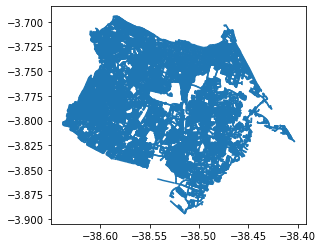

In [6]:
# plot only the road's network
edges.plot()

## Análise de menor caminho

Vamos agora calcular o caminho mais curto entre dois pontos. Primeiro, precisamos especificar os locais de origem e destino de nossa rota.

O nosso objetivo será obter a rota e a distância percorrida em metros, do departamento de computação para o Shopping Benfica, utilizando a rede rodoviária.

1. Primeiro precisamos definir a localização da nossa origiem e destino. Para isso podemos usar o OpenStreeMapo ou Google Maps para obter as coordenadas.

In [7]:
from shapely.geometry import Point

# approximate coord of computer department: -3.746088, -38.574236
# approximate coord of benfica shopping: -3.739631, -38.540785

origin = Point(-3.746088, -38.574236)
destiny = Point(-3.739631, -38.540785)

2. Em seguida precisamos de uma rede de ruas que apresente pelo menos os pontos de origem e destino. A alternativa mais simples seria carregar toda a rede de ruas da cidade de Fortaleza, porém isso acrescentaria um custo de computação amais. Utilizando os nosso conhecimento, vamos diminuir a rede de busca.

    Visualizando as divisões administrativas das [AIS](https://www.sspds.ce.gov.br/ais/), visto na aula passada, podemos ver que o campus do pici está na AIS 6 e o shopping na AIS 5, e que as duas são adjacentes. O módulo OSMnx possui diversas opções para carregar dados do OSM, é uma delas é passando um polígono da área desejada em que se deseja obter o grafo.

    Vamos utilizar as divisões administrativas das AIS para obter um grafo reduzido para a nossa análise.
    
 

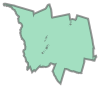

In [8]:
import geopandas as gpd

# filename of the ais data
ais_fp = 'data/ais.shp'

# load the ais data
ais_gdf = gpd.read_file(ais_fp)

# separate only the desired data
poly_ais_5 = ais_gdf.loc[ais_gdf['AIS'] == 5, 'geometry'].values[0]
poly_ais_6 = ais_gdf.loc[ais_gdf['AIS'] == 6, 'geometry'].values[0]

poly = poly_ais_5.union(poly_ais_6)
poly

Agora vamos utilizar o OSMnx para obter o grafo dentro do nosso polygon. Para isso podemos utilizar a função `graph_from_polygon()`. Lembrando que queremos somente a rede de carros, então usaremos o parâmetro network_type.

In [9]:
graph = ox.graph_from_polygon(poly, network_type='drive')

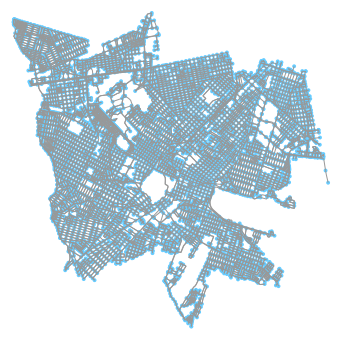

In [10]:
fig, ax = ox.plot_graph(graph)

3. Para calcular a menor rota no grafo precisamos que os nodes de origem e destino estejam presentes no grafo. Para isso vamos calcular o nó mais próximo do nosso ponto de origem e do nosso ponto de destino.

In [11]:
# Get the x and y coordinates
origin_xy = (origin.x, origin.y)
dest_xy = (destiny.x, destiny.y)

# Find the closest origin and target nodes from the graph (the ids of them)
orig_node = ox.get_nearest_node(graph, origin_xy, method='euclidean')
target_node = ox.get_nearest_node(graph, dest_xy, method='euclidean')

In [12]:
# Show the results
print(orig_node)
print(target_node)

1715055233
4345811070


Agora que já temos os nós de origem e destino, vamos calcular o menor caminho na rede de ruas utilizando o algoritmo de Dijkstra. Para isso podemos usar a função `shortest_path` do networkx.

In [13]:
import networkx as nx

# Calculate the shortest path
route = nx.shortest_path(G=graph, source=orig_node, target=target_node, weight='length')

# Show what we have
print(route)

[1715055233, 2021816284, 3717389798, 1715055143, 7660832885, 6110861089, 3761098870, 2846590965, 2021751118, 4349088616, 2021751119, 2021816255, 2021816295, 1787532774, 2425331572, 4663984417, 1973316057, 265075407, 1973316061, 4548136110, 265075286, 265075284, 265075282, 265075281, 265075280, 265075279, 265075277, 265075276, 265075275, 265075273, 2512714321, 2512714322, 265075304, 265075306, 2852830928, 265075307, 265075309, 626124685, 265075345, 265075351, 2512714328, 626124684, 626124682, 629737281, 626124630, 626124628, 3240093691, 2722597719, 265020933, 2506464346, 4347796644, 4322326957, 2722597714, 4347175359, 4367679183, 4347175360, 4347175363, 1993226022, 5906869805, 1993225734, 1993225702, 4345811070]


Como resultado, obtemos uma lista de todos os nós que estão no caminho mais curto.

- Poderíamos extrair os locais desses nós do `nodes_proj` GeoDataFrame e criar uma LineString dos pontos, mas, felizmente, o OSMnx pode fazer isso para nós e podemos traçar o caminho mais curto usando a função` plot_graph_route () `:

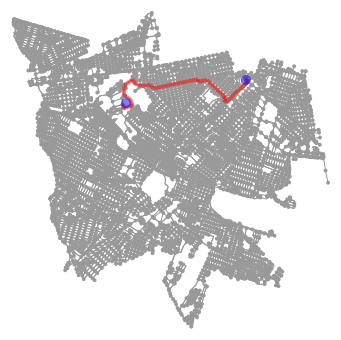

In [14]:
# Plot the shortest path
fig, ax = ox.plot_graph_route(graph, route, origin_point=origin_xy, 
                              destination_point=dest_xy)

Para calcular o tamanho da nossa rota em metros, vamos primeiro criar um LineString da nossa rota, depois mudar a e projeção e finalmente usaremos o método `length`

Para criar o nosso LineString precisamos das informações de latitude e longitude, porém só temos o id dos nós. Então primeiro vamos filtrar dos nossos dados o nós da nossa rota pelo id.

In [15]:
# Retrieve only edges from the graph
nodes, edges = ox.graph_to_gdfs(graph)

# Get the nodes along the shortest path
route_nodes = nodes.loc[route]
route_nodes.head()

,y,x,osmid,highway,geometry
1715055233,-3.746408,-38.575238,1715055233,NaN,POINT (-38.57524 -3.74641)
2021816284,-3.747525,-38.574954,2021816284,NaN,POINT (-38.57495 -3.74752)
3717389798,-3.746794,-38.572688,3717389798,NaN,POINT (-38.57269 -3.74679)
1715055143,-3.744072,-38.574486,1715055143,NaN,POINT (-38.57449 -3.74407)
7660832885,-3.744069,-38.574489,7660832885,NaN,POINT (-38.57449 -3.74407)


Como pode ser visto as coordenadas estão na projeção Mercator, que é a mesma utilizada pelo Google (de onde definimos as nossas coordenadas). Para podermos calcular a distância em metros, vamos primeiro transformar a projeção dos dados para a projeção Corrego Alegre / UTM zone 22S ([epsg 22525](https://spatialreference.org/ref/epsg/corrego-alegre-utm-zone-22s/))  que possue uma aproximação melhor para a região nordeste do brasil.

In [16]:
# Change projection of the data
new_epsg = 22525 # more accurate for northeast region

route_nodes_proj = route_nodes.to_crs(epsg=new_epsg)
route_nodes_proj.head()

,y,x,osmid,highway,geometry
1715055233,-3.746408,-38.575238,1715055233,NaN,POINT (-120073.184 9583932.611)
2021816284,-3.747525,-38.574954,2021816284,NaN,POINT (-120040.797 9583808.771)
3717389798,-3.746794,-38.572688,3717389798,NaN,POINT (-119788.486 9583891.512)
1715055143,-3.744072,-38.574486,1715055143,NaN,POINT (-119990.941 9584192.557)
7660832885,-3.744069,-38.574489,7660832885,NaN,POINT (-119991.289 9584192.910)


Finalmente podemos criar o nosso LineString usando a projeção apropriada para a nossa tarefa.

tamanho da rota em metros: 6004.964m


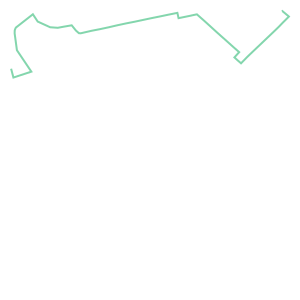

In [17]:
from shapely.geometry import LineString, Point

# Create a geometry for the shortest path
route_line = LineString(list(route_nodes_proj.geometry.values))
print("tamanho da rota em metros: {:.3f}m".format(route_line.length))
route_line